<a href="https://colab.research.google.com/github/Sunita02Kumari/Injection-attack-detection/blob/main/Summer_Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split 

In [ ]:
# Load the csv training dataset
dftr=pd.read_csv('/content/drive/MyDrive/ML Project/Detection of injection attack in Wi-Fi /AWID_CLS_R_TRN_N.csv')

In [ ]:
dftr.dtypes

frame.interface_id                  int64
frame.dlt                          object
frame.offset_shift                  int64
frame.time_epoch                    int64
frame.time_delta                  float64
                                   ...   
wlan.qos.bit4                      object
wlan.qos.txop_dur_req              object
wlan.qos.buf_state_indicated.1     object
data.len                           object
class                              object
Length: 155, dtype: object

In [ ]:
dftr.shape

(1037196, 155)

In [ ]:
#Data cleaning and Pre-processing

In [ ]:
#It print the sum of ? in every column
dftr.isin(['?']).sum()

frame.interface_id                      0
frame.dlt                         1037196
frame.offset_shift                      0
frame.time_epoch                        0
frame.time_delta                        0
                                   ...   
wlan.qos.bit4                      929537
wlan.qos.txop_dur_req              929537
wlan.qos.buf_state_indicated.1     653872
data.len                           508999
class                                   0
Length: 155, dtype: int64

In [ ]:
# Replceing ? with Null value(NAN)
dftr.replace({"?": None}, inplace=True)

In [ ]:
null_percentage=dftr.isna().sum()*100.0/dftr.shape[0]
null_percentage.head()

frame.interface_id      0.0
frame.dlt             100.0
frame.offset_shift      0.0
frame.time_epoch        0.0
frame.time_delta        0.0
dtype: float64

In [ ]:
col_to_drop=null_percentage[null_percentage>=50].keys()
col_to_drop

Index(['frame.dlt', 'wlan.bar.type', 'wlan.ba.control.ackpolicy',
       'wlan.ba.control.multitid', 'wlan.ba.control.cbitmap',
       'wlan.bar.compressed.tidinfo', 'wlan.ba.bm',
       'wlan_mgt.fixed.capabilities.ess', 'wlan_mgt.fixed.capabilities.ibss',
       'wlan_mgt.fixed.capabilities.cfpoll.ap',
       'wlan_mgt.fixed.capabilities.privacy',
       'wlan_mgt.fixed.capabilities.preamble',
       'wlan_mgt.fixed.capabilities.pbcc',
       'wlan_mgt.fixed.capabilities.agility',
       'wlan_mgt.fixed.capabilities.spec_man',
       'wlan_mgt.fixed.capabilities.short_slot_time',
       'wlan_mgt.fixed.capabilities.apsd',
       'wlan_mgt.fixed.capabilities.radio_measurement',
       'wlan_mgt.fixed.capabilities.dsss_ofdm',
       'wlan_mgt.fixed.capabilities.del_blk_ack',
       'wlan_mgt.fixed.capabilities.imm_blk_ack', 'wlan_mgt.fixed.listen_ival',
       'wlan_mgt.fixed.current_ap', 'wlan_mgt.fixed.status_code',
       'wlan_mgt.fixed.timestamp', 'wlan_mgt.fixed.beacon',
       '

In [ ]:
dftr=dftr.drop(col_to_drop,axis=1)

In [ ]:
dftr.shape

(1037196, 87)

In [ ]:
#Drop the row which contains Null value(NAN)
dftr.dropna(inplace=True)

In [ ]:
dftr.shape

(524238, 87)

In [ ]:
object_datatype=dftr.select_dtypes(include='object')
object_datatype

,radiotap.present.reserved,wlan.fc.type_subtype,wlan.fc.ds,wlan.ra,wlan.da,wlan.ta,wlan.sa,wlan.bssid,wlan.frag,wlan.seq,wlan.wep.iv,wlan.wep.key,wlan.wep.icv,data.len,class
17,0x00000000,0x28,0x02,c0:18:85:94:b6:55,c0:18:85:94:b6:55,28:c6:8e:86:d3:d6,00:13:33:87:62:6d,28:c6:8e:86:d3:d6,0,96,0x108dc1,0,0x8aba05cf,1460,normal
18,0x00000000,0x28,0x01,28:c6:8e:86:d3:d6,00:13:33:87:62:6d,c0:18:85:94:b6:55,c0:18:85:94:b6:55,28:c6:8e:86:d3:d6,0,1217,0x701db2,0,0xa7a76f9d,60,normal
20,0x00000000,0x28,0x02,c0:18:85:94:b6:55,c0:18:85:94:b6:55,28:c6:8e:86:d3:d6,00:13:33:87:62:6d,28:c6:8e:86:d3:d6,0,97,0x118dc1,0,0xac302443,89,normal
28,0x00000000,0x28,0x01,28:c6:8e:86:d3:d6,00:13:33:87:62:6d,c0:18:85:94:b6:55,c0:18:85:94:b6:55,28:c6:8e:86:d3:d6,0,1220,0x701db5,0,0x9a31b670,60,normal
31,0x00000000,0x28,0x02,c0:18:85:94:b6:55,c0:18:85:94:b6:55,28:c6:8e:86:d3:d6,00:13:33:87:62:6d,28:c6:8e:86:d3:d6,0,99,0x138dc1,0,0x3854f67e,60,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037189,0x00000000,0x28,0x02,c0:18:85:94:b6:55,c0:18:85:94:b6:55,28:c6:8e:86:d3:d6,00:13:33:87:62:6d,28:c6:8e:86:d3:d6,0,1852,0xd648ca,0,0xf8bea63f,1488,normal
1037191,0x00000000,0x28,0x01,28:c6:8e:86:d3:d6,00:13:33:87:62:6d,c0:18:85:94:b6:55,c0:18:85:94:b6:55,28:c6:8e:86:d3:d6,0,2479,0x73c2be,0,0xd2f1689a,60,normal
1037192,0x00000000,0x28,0x01,28:c6:8e:86:d3:d6,00:13:33:87:62:6d,c0:18:85:94:b6:55,c0:18:85:94:b6:55,28:c6:8e:86:d3:d6,0,2480,0x73c2bf,0,0x508ec8a0,60,normal
1037194,0x00000000,0x28,0x02,c0:18:85:94:b6:55,c0:18:85:94:b6:55,28:c6:8e:86:d3:d6,00:13:33:87:62:6d,28:c6:8e:86:d3:d6,0,1853,0xd748ca,0,0x70d5056b,1488,normal


In [ ]:
# Label Encoding with traning dataset
from sklearn.preprocessing import LabelEncoder
le_Class=LabelEncoder()

In [ ]:
dftr['class_n']=le_Class.fit_transform(dftr['class'])
dftr.head()

,frame.interface_id,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,frame.ignored,...,wlan.bssid,wlan.frag,wlan.seq,wlan.fcs_good,wlan.wep.iv,wlan.wep.key,wlan.wep.icv,data.len,class,class_n
17,0,0,1393661303,0.002270,0.002270,0.217518,1524,1524,0,0,...,28:c6:8e:86:d3:d6,0,96,1.0,0x108dc1,0,0x8aba05cf,1460,normal,1
18,0,0,1393661303,0.000621,0.000621,0.218139,124,124,0,0,...,28:c6:8e:86:d3:d6,0,1217,1.0,0x701db2,0,0xa7a76f9d,60,normal,1
20,0,0,1393661303,0.000144,0.000144,0.229118,153,153,0,0,...,28:c6:8e:86:d3:d6,0,97,1.0,0x118dc1,0,0xac302443,89,normal,1
28,0,0,1393661303,0.021711,0.021711,0.367359,124,124,0,0,...,28:c6:8e:86:d3:d6,0,1220,1.0,0x701db5,0,0x9a31b670,60,normal,1
31,0,0,1393661303,0.000058,0.000058,0.380933,124,124,0,0,...,28:c6:8e:86:d3:d6,0,99,1.0,0x138dc1,0,0x3854f67e,60,normal,1


In [ ]:
dftr.select_dtypes(['number']).shape

(524238, 73)

In [ ]:
# Convert the Object datatype into numerical datatype
for col in dftr.columns:
    dftr[col] = pd.to_numeric(dftr[col], errors='ignore')

In [ ]:
dftr.select_dtypes(['number']).shape

(524238, 77)

In [ ]:
object_datatype=dftr.select_dtypes(include='object')
object_datatype

,radiotap.present.reserved,wlan.fc.type_subtype,wlan.fc.ds,wlan.ra,wlan.da,wlan.ta,wlan.sa,wlan.bssid,wlan.wep.iv,wlan.wep.icv,class
17,0x00000000,0x28,0x02,c0:18:85:94:b6:55,c0:18:85:94:b6:55,28:c6:8e:86:d3:d6,00:13:33:87:62:6d,28:c6:8e:86:d3:d6,0x108dc1,0x8aba05cf,normal
18,0x00000000,0x28,0x01,28:c6:8e:86:d3:d6,00:13:33:87:62:6d,c0:18:85:94:b6:55,c0:18:85:94:b6:55,28:c6:8e:86:d3:d6,0x701db2,0xa7a76f9d,normal
20,0x00000000,0x28,0x02,c0:18:85:94:b6:55,c0:18:85:94:b6:55,28:c6:8e:86:d3:d6,00:13:33:87:62:6d,28:c6:8e:86:d3:d6,0x118dc1,0xac302443,normal
28,0x00000000,0x28,0x01,28:c6:8e:86:d3:d6,00:13:33:87:62:6d,c0:18:85:94:b6:55,c0:18:85:94:b6:55,28:c6:8e:86:d3:d6,0x701db5,0x9a31b670,normal
31,0x00000000,0x28,0x02,c0:18:85:94:b6:55,c0:18:85:94:b6:55,28:c6:8e:86:d3:d6,00:13:33:87:62:6d,28:c6:8e:86:d3:d6,0x138dc1,0x3854f67e,normal
...,...,...,...,...,...,...,...,...,...,...,...
1037189,0x00000000,0x28,0x02,c0:18:85:94:b6:55,c0:18:85:94:b6:55,28:c6:8e:86:d3:d6,00:13:33:87:62:6d,28:c6:8e:86:d3:d6,0xd648ca,0xf8bea63f,normal
1037191,0x00000000,0x28,0x01,28:c6:8e:86:d3:d6,00:13:33:87:62:6d,c0:18:85:94:b6:55,c0:18:85:94:b6:55,28:c6:8e:86:d3:d6,0x73c2be,0xd2f1689a,normal
1037192,0x00000000,0x28,0x01,28:c6:8e:86:d3:d6,00:13:33:87:62:6d,c0:18:85:94:b6:55,c0:18:85:94:b6:55,28:c6:8e:86:d3:d6,0x73c2bf,0x508ec8a0,normal
1037194,0x00000000,0x28,0x02,c0:18:85:94:b6:55,c0:18:85:94:b6:55,28:c6:8e:86:d3:d6,00:13:33:87:62:6d,28:c6:8e:86:d3:d6,0xd748ca,0x70d5056b,normal


In [ ]:
dftr.shape

(524238, 88)

In [ ]:
dftr=dftr.select_dtypes(include='number')
dftr.shape

(524238, 77)

In [ ]:
#Feature Selection using Constant removal and Recursive feature Eleimination

In [ ]:
# Constant removal feature eleimination
from sklearn.feature_selection import VarianceThreshold
var_threshold=VarianceThreshold(threshold=0)
var_threshold.fit(dftr)

VarianceThreshold(threshold=0)

In [ ]:
print(var_threshold.variances_)

[0.00000000e+00 0.00000000e+00 2.01600000e+03 1.15477439e-05
 1.15477439e-05 2.01628308e+03 1.50500000e+03 1.50500000e+03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.01626317e+09
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.30000000e+01 2.26039910e-02 0.00000000e+00 6.45423760e-02
 6.45423760e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.69678921e+01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.27241199e-04 3.91908304e+00
 5.07145668e-04 7.331460

In [ ]:
var_threshold.get_support()

array([False, False,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
        True, False,  True,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True, False, False,  True,  True])

In [ ]:
constant_column=[column for column in dftr.columns
                 if column not in dftr.columns[var_threshold.get_support()]]
print(len(constant_column))

54


In [ ]:
for feature in constant_column:
  print(feature)

frame.interface_id
frame.offset_shift
frame.marked
frame.ignored
radiotap.version
radiotap.pad
radiotap.length
radiotap.present.tsft
radiotap.present.flags
radiotap.present.rate
radiotap.present.channel
radiotap.present.fhss
radiotap.present.dbm_antsignal
radiotap.present.dbm_antnoise
radiotap.present.lock_quality
radiotap.present.tx_attenuation
radiotap.present.db_tx_attenuation
radiotap.present.dbm_tx_power
radiotap.present.antenna
radiotap.present.db_antsignal
radiotap.present.db_antnoise
radiotap.present.rxflags
radiotap.present.xchannel
radiotap.present.mcs
radiotap.present.ampdu
radiotap.present.vht
radiotap.present.rtap_ns
radiotap.present.vendor_ns
radiotap.present.ext
radiotap.flags.cfp
radiotap.flags.preamble
radiotap.flags.wep
radiotap.flags.frag
radiotap.flags.fcs
radiotap.flags.datapad
radiotap.flags.badfcs
radiotap.flags.shortgi
radiotap.channel.type.turbo
radiotap.channel.type.2ghz
radiotap.channel.type.5ghz
radiotap.channel.type.passive
radiotap.channel.type.dynamic
rad

In [ ]:
dftr=dftr.drop(constant_column,axis=1)

In [ ]:
dftr.shape

(524238, 23)

In [ ]:
X_tr=dftr.drop('class_n',axis=1)
X_tr.head()

,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,radiotap.mactime,radiotap.datarate,radiotap.channel.freq,radiotap.channel.type.cck,...,wlan.fc.type,wlan.fc.subtype,wlan.fc.frag,wlan.fc.retry,wlan.fc.pwrmgt,wlan.fc.moredata,wlan.duration,wlan.frag,wlan.seq,data.len
17,1393661303,0.002270,0.002270,0.217518,1524,1524,2.101817e+09,54,2437.0,0.0,...,2,8,0,0,0,0,44.0,0,96,1460
18,1393661303,0.000621,0.000621,0.218139,124,124,2.101818e+09,54,2437.0,0.0,...,2,8,0,0,0,0,44.0,0,1217,60
20,1393661303,0.000144,0.000144,0.229118,153,153,2.101829e+09,54,2437.0,0.0,...,2,8,0,0,0,0,44.0,0,97,89
28,1393661303,0.021711,0.021711,0.367359,124,124,2.101967e+09,54,2437.0,0.0,...,2,8,0,0,0,0,44.0,0,1220,60
31,1393661303,0.000058,0.000058,0.380933,124,124,2.101981e+09,54,2437.0,0.0,...,2,8,0,0,0,0,44.0,0,99,60


In [ ]:
X_tr.shape

(524238, 22)

In [ ]:
y_tr=dftr[['class_n']]
y_tr.head()

,class_n
17,1
18,1
20,1
28,1
31,1


In [ ]:
y_tr.shape

(524238, 1)

In [ ]:
#testing Dataset
dfte=pd.read_csv('/content/drive/MyDrive/ML Project/Detection of injection attack in Wi-Fi /AWID_CLS_R_TST_N.csv')

dfte.replace({"?": None}, inplace=True)
null_percentage_te = dfte.isna().sum()*100.0/dfte.shape[0]
col_to_drop_te = null_percentage_te[null_percentage_te>=45].keys()
dfte = dfte.drop(col_to_drop_te,axis=1)
dfte.dropna(inplace=True)


# Label Encoding with test dataset
from sklearn.preprocessing import LabelEncoder
le_Class_te = LabelEncoder()
dfte['class_n'] = le_Class_te.fit_transform(dfte['class'])
dfte = dfte.drop('class', axis=1)


# Convert Dataset(object type of data) into numeric
for col in dfte.columns:
    dfte[col] = pd.to_numeric(dfte[col], errors='ignore')

dfte = dfte.select_dtypes(include='number')

# Constant removal feature eleimination

from sklearn.feature_selection import VarianceThreshold
var_threshold_te = VarianceThreshold(threshold=0)
var_threshold_te.fit(dfte)
var_threshold_te.variances_
var_threshold_te.get_support()
constant_column_te = [column for column in dfte.columns 
                   if column not in dfte.columns[var_threshold_te.get_support()]]

dfte = dfte.drop(constant_column_te , axis = 1)

X_te = dfte.drop('class_n',axis=1)
y_te = dfte.class_n

In [ ]:
dfte.shape

(362967, 23)

In [ ]:
dftr.shape

(524238, 23)

In [ ]:
X_tr.shape

(524238, 22)

In [ ]:
X_te.shape

(362967, 22)

In [ ]:
from sklearn import tree
model1 = tree.DecisionTreeClassifier()
model1.fit(X_tr, y_tr)
model1.score(X_te, y_te)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- wlan.fc.protected
Feature names seen at fit time, yet now missing:
- data.len

  warnings.warn(message, FutureWarning)


0.9540398989439811

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=20)
model2.fit(X_tr,y_tr)
model2.score(X_te,y_te)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- wlan.fc.protected
Feature names seen at fit time, yet now missing:
- data.len

  warnings.warn(message, FutureWarning)


0.9540398989439811

In [ ]:
# Confusion Matrix
y_predicted = model2.predict(X_te)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_te,y_predicted)
cm

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- wlan.fc.protected
Feature names seen at fit time, yet now missing:
- data.len

  warnings.warn(message, FutureWarning)


array([[     0,  16682],
       [     0, 346285]])

Text(69.0, 0.5, 'Truth')

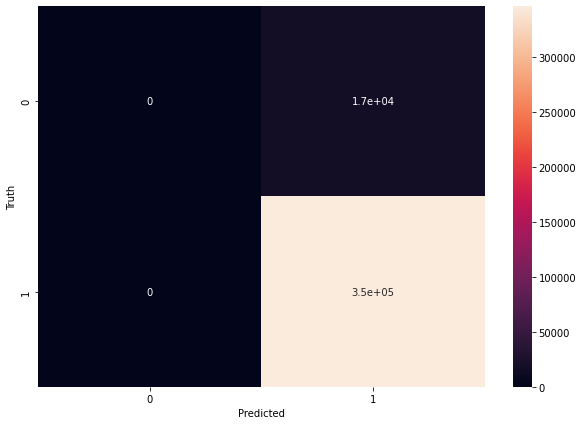

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# # Recursive feature Eleimination

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),n_features_to_select=8)
select.fit(X_tr,y_tr)
X_tr_new = select.transform(X_tr)

print("X_tr.shape : {}".format(X_tr.shape))
print("X_tr_new :{}".format(X_tr_new.shape))

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expe

X_tr.shape : (524238, 22)
X_tr_new :(524238, 8)


In [ ]:
X_te_new = select.transform(X_te)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- wlan.fc.protected
Feature names seen at fit time, yet now missing:
- data.len

  warnings.warn(message, FutureWarning)


In [ ]:
from sklearn import tree
model1 = tree.DecisionTreeClassifier()
model1.fit(X_tr_new, y_tr)
model1.score(X_te_new, y_te)

0.9540398989439811

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=20)
model2.fit(X_tr_new,y_tr)
model2.score(X_te_new,y_te)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9540398989439811

In [ ]:
# Confusion Matrix
y_predicted = model2.predict(X_te_new)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_te,y_predicted)
cm

array([[     0,  16682],
       [     0, 346285]])

Text(69.0, 0.5, 'Truth')

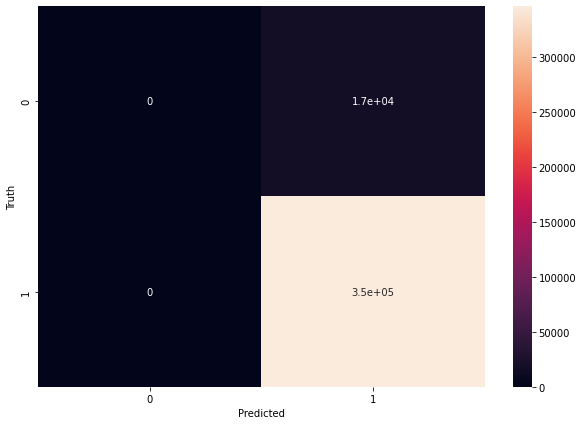

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#importing accuracy_score,precision_score,recall_score.F1_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
accuracy_score(y_te,y_predicted)

0.9540398989439811

In [ ]:
precision_score(y_te,y_predicted)

0.9540398989439811

In [ ]:
recall_score(y_te,y_predicted)

1.0

In [ ]:
f1_score(y_te,y_predicted)

0.9764794459515095